#**ASSIGNMENT 6**

##Hello World of Machine Learning
###The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

**1. Importing Dependencies**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**2. Loading the dataset**

In [ ]:
flower_data = pd.read_csv('/content/iris.data')

**3. Summarizing the dataset**


Dimensions of the dataset



In [ ]:
flower_data.shape

(149, 5)

Peek at the data itself

In [ ]:
flower_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Checking for blanks

In [ ]:
flower_data.isnull().sum()

,0
5.1,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


Statistical summary of all attributes

In [ ]:
flower_data.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Breakdown of the data by the class variable

In [ ]:
flower_data.groupby('Iris-setosa').size()

,0
Iris-setosa,
Iris-setosa,49
Iris-versicolor,50
Iris-virginica,50


**4.	Visualizing the dataset**

Univariate Plot for '5.1' (lineplot)

Univariate Plot for '3.5' (barplot)

Univariate Plot for '1.4' (jointplot)

Univariate Plot for '0.2' (histplot)

<Axes: xlabel='0.2', ylabel='Count'>

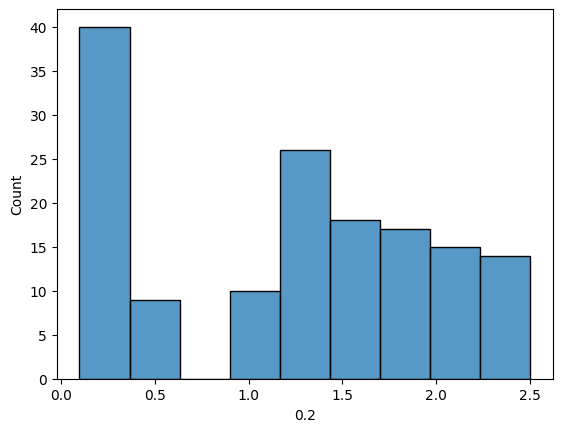

In [ ]:
sns.histplot(flower_data['0.2'])

Univariate Plot for 'Iris-setosa' (pointplot)

Multivariate plot for '0.2' vs 'Iris-setosa' (boxplot)

<Axes: xlabel='0.2', ylabel='Iris-setosa'>

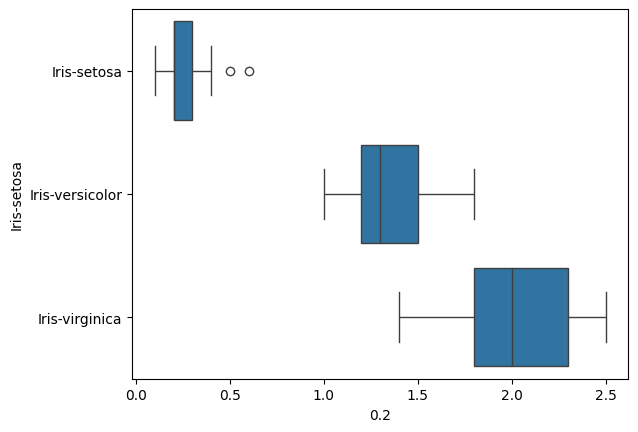

In [ ]:
sns.boxplot(flower_data, x='0.2', y='Iris-setosa')

**5.	Evaluating some algorithms**

Separate out a validation dataset

In [ ]:
Y = flower_data['Iris-setosa']
X = flower_data.drop('Iris-setosa', axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(119, 4) (30, 4) (119,) (30,)


Logistic Regression (LR) Model

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
lr_score = model_lr.score(X_test, Y_test)
print(f"Logistic Regression Accuracy: {lr_score:.2f}")

Logistic Regression Accuracy: 1.00


Linear Discriminant Analysis (LDA) Model

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, Y_train)
lda_score = model_lda.score(X_test, Y_test)
print(f"Linear Discriminant Analysis Accuracy: {lda_score:.2f}")

Linear Discriminant Analysis Accuracy: 1.00


K-Nearest Neighbors (KNN) Model

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
knn_score = model_knn.score(X_test, Y_test)
print(f"K-Nearest Neighbors Accuracy: {knn_score:.2f}")

K-Nearest Neighbors Accuracy: 0.97


Classification and Regression Trees (CART) Model

In [ ]:
model_cart = DecisionTreeClassifier()
model_cart.fit(X_train, Y_train)
cart_score = model_cart.score(X_test, Y_test)
print(f"CART Accuracy: {cart_score:.2f}")

CART Accuracy: 1.00


Gaussian Naive Bayes (NB) Model

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)
nb_score = model_nb.score(X_test, Y_test)
print(f"Gaussian Naive Bayes Accuracy: {nb_score:.2f}")

Gaussian Naive Bayes Accuracy: 1.00


Support Vector Machines (SVM) Model

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, Y_train)
svm_score = model_svm.score(X_test, Y_test)
print(f"Support Vector Machines Accuracy: {svm_score:.2f}")

Support Vector Machines Accuracy: 1.00


Comparing the accuracy of the models

In [ ]:
accuracy = [lr_score,lda_score,knn_score,cart_score,nb_score,svm_score]
algorithms = ['Logistic Regression','Linear Discriminant Analysis','K-Nearest Neighbors','Classification and Regression Trees','Gaussian Naive Bayes','Support Vector Machines']
score_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracy Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy Score
0,Logistic Regression,1.000000
1,Linear Discriminant Analysis,1.000000
2,K-Nearest Neighbors,0.966667
3,Classification and Regression Trees,1.000000
4,Gaussian Naive Bayes,1.000000
5,Support Vector Machines,1.000000


Selecting best model

In [ ]:
max_index = accuracy.index(max(accuracy))
best_model = algorithms[max_index]
print(f"Best model: {best_model} \nAccuracy: {max(accuracy):.2f}")

Best model: Logistic Regression 
Accuracy: 1.00


Plotting the accuracies

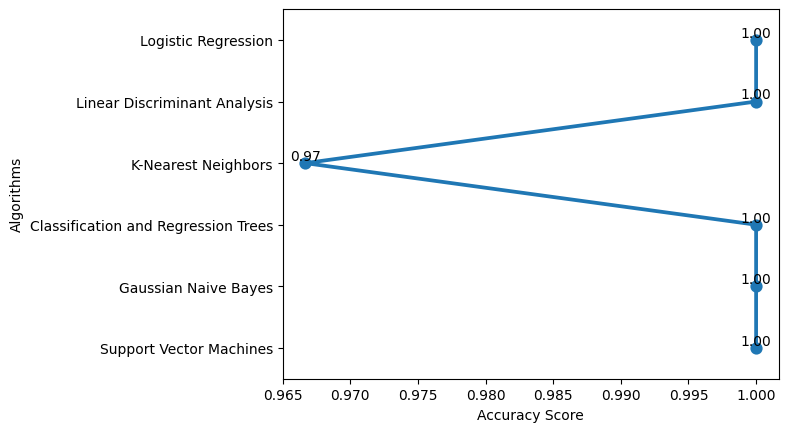

In [ ]:
sns.pointplot(data=score_df, x='Accuracy Score', y='Algorithms')
for i in range(len(score_df)):
    plt.text(score_df['Accuracy Score'][i], i, f'{score_df["Accuracy Score"][i]:.2f}',
             ha='center', va='bottom')

**6.	Making some predictions**

In [ ]:
input_data = (5.8,4.0,1.2,0.2)
input_data_df = pd.DataFrame([input_data], columns=X_train.columns)

models = {
    'Logistic Regression': model_lr,
    'Linear Discriminant Analysis': model_lda,
    'K-Nearest Neighbors': model_knn,
    'Classification and Regression Trees': model_cart,
    'Gaussian Naive Bayes': model_nb,
    'Support Vector Machines': model_svm
}

optimal_model = models[best_model]
prediction = optimal_model.predict(input_data_df)
print(prediction)
print(f"predicted using {best_model}")

['Iris-setosa']
predicted using Logistic Regression


In [6]:
def print_matrix(matrix):
    for row in matrix:
        print(" ".join(map(str, row)))
    print()

def transpose_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    transpose = [[matrix[j][i] for j in range(rows)] for i in range(cols)]
    return transpose

matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

print("Original matrix:")
print_matrix(matrix)

transpose = transpose_matrix(matrix)
print("Transpose of the matrix:")
print_matrix(transpose)


Original matrix:
1 2 3
4 5 6
7 8 9

Transpose of the matrix:
1 4 7
2 5 8
3 6 9



In [7]:
def is_sparse(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    count_zero = sum(matrix[i][j] == 0 for i in range(rows) for j in range(cols))
    total_elements = rows * cols
    return count_zero > total_elements / 2

matrix = [
    [0, 0, 0],
    [5, 0, 0],
    [0, 0, 0]
]

print("Matrix:")
print_matrix(matrix)
print("Is the matrix sparse?", is_sparse(matrix))


Matrix:
0 0 0
5 0 0
0 0 0

Is the matrix sparse? True


In [8]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def count_primes(arr):
    return sum(1 for num in arr if is_prime(num))

arr = [2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Array:", arr)
print("Count of prime numbers:", count_primes(arr))


Array: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Count of prime numbers: 4


In [9]:
def second_highest(arr):
    unique_arr = list(set(arr))
    if len(unique_arr) < 2:
        return None
    unique_arr.sort()
    return unique_arr[-2]

arr = [12, 45, 23, 67, 45, 89, 23]
print("Array:", arr)
print("Second highest element:", second_highest(arr))


Array: [12, 45, 23, 67, 45, 89, 23]
Second highest element: 67


In [10]:
def count_non_zero(arr):
    return sum(1 for x in arr if x != 0)

arr = [0, 1, 0, 3, 4, 0, 5]
print("Array:", arr)
print("Count of non-zero elements:", count_non_zero(arr))


Array: [0, 1, 0, 3, 4, 0, 5]
Count of non-zero elements: 4


In [11]:
def merge_arrays(arr1, arr2):
    return arr1 + arr2

arr1 = [1.1, 2.2, 3.3]
arr2 = [4.4, 5.5, 6.6]
print("Array 1:", arr1)
print("Array 2:", arr2)
print("Merged Array:", merge_arrays(arr1, arr2))


Array 1: [1.1, 2.2, 3.3]
Array 2: [4.4, 5.5, 6.6]
Merged Array: [1.1, 2.2, 3.3, 4.4, 5.5, 6.6]


In [12]:
def add_arrays(arr1, arr2):
    return [a + b for a, b in zip(arr1, arr2)]

arr1 = [1, 2, 3]
arr2 = [4, 5, 6]
print("Array 1:", arr1)
print("Array 2:", arr2)
print("Sum Array:", add_arrays(arr1, arr2))


Array 1: [1, 2, 3]
Array 2: [4, 5, 6]
Sum Array: [5, 7, 9]


In [13]:
import numpy as np

def multiply_matrices(A, B):
    return np.dot(A, B)

A = [
    [1, 2],
    [3, 4]
]
B = [
    [5, 6],
    [7, 8]
]

print("Matrix A:")
print(np.array(A))
print("Matrix B:")
print(np.array(B))

result = multiply_matrices(A, B)
print("Product of A and B:")
print(result)


Matrix A:
[[1 2]
 [3 4]]
Matrix B:
[[5 6]
 [7 8]]
Product of A and B:
[[19 22]
 [43 50]]


In [14]:
def subtract_matrices(A, B):
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

A = [
    [10, 20, 30],
    [40, 50, 60]
]
B = [
    [1, 2, 3],
    [4, 5, 6]
]

print("Matrix A:")
print_matrix(A)
print("Matrix B:")
print_matrix(B)

result = subtract_matrices(A, B)
print("Difference of A and B:")
print_matrix(result)


Matrix A:
10 20 30
40 50 60

Matrix B:
1 2 3
4 5 6

Difference of A and B:
9 18 27
36 45 54



In [15]:
from collections import Counter

def find_duplicates(arr):
    counts = Counter(arr)
    return {item: count for item, count in counts.items() if count > 1}

arr = [1, 2, 3, 4, 5, 3, 2, 1, 1]
print("Array:", arr)
print("Duplicates and their frequencies:", find_duplicates(arr))


Array: [1, 2, 3, 4, 5, 3, 2, 1, 1]
Duplicates and their frequencies: {1: 3, 2: 2, 3: 2}


In [16]:
def print_alternate(arr):
    return arr[::2]

arr = [10, 20, 30, 40, 50, 60, 70]
print("Array:", arr)
print("Alternate numbers:", print_alternate(arr))


Array: [10, 20, 30, 40, 50, 60, 70]
Alternate numbers: [10, 30, 50, 70]


In [3]:
!apt-get install -y pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [4]:
import pypandoc

# Convert Markdown to Word
output = pypandoc.convert_file('your_notebook.md', 'docx', outputfile="your_document.docx")
assert output == ""



[WARNING] Could not fetch resource 'output_18_1.png': PandocResourceNotFound "output_18_1.png"
[WARNING] Could not fetch resource 'output_20_1.png': PandocResourceNotFound "output_20_1.png"
[WARNING] Could not fetch resource 'output_22_1.png': PandocResourceNotFound "output_22_1.png"
[WARNING] Could not fetch resource 'output_24_1.png': PandocResourceNotFound "output_24_1.png"
[WARNING] Could not fetch resource 'output_26_1.png': PandocResourceNotFound "output_26_1.png"
[WARNING] Could not fetch resource 'output_28_1.png': PandocResourceNotFound "output_28_1.png"
[WARNING] Could not fetch resource 'output_30_1.png': PandocResourceNotFound "output_30_1.png"
[WARNING] Could not fetch resource 'output_32_1.png': PandocResourceNotFound "output_32_1.png"
[WARNING] Could not fetch resource 'output_34_1.png': PandocResourceNotFound "output_34_1.png"
[WARNING] Could not fetch resource 'output_57_0.png': PandocResourceNotFound "output_57_0.png"




In [17]:
# Install necessary packages
!apt-get install -y pandoc
!pip install pypandoc

import pypandoc

# Convert Jupyter Notebook to Markdown
!jupyter nbconvert --to markdown Assignment_6.ipynb

# Convert Markdown to Word
output = pypandoc.convert_file('Assignment_6.md', 'docx', outputfile='Assignment_6.docx')

# Download the Word Document
from google.colab import files
files.download('Assignment_6.docx')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook Assignment_6.ipynb to markdown
[NbConvertApp] Support files will be in Assignment_6_files/
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Making directory Assignment_6_files
[NbConvertApp] Writing 26959 bytes to Assignment_6.md


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>